In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler(feature_range=(0,1))
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense,SimpleRNN

In [30]:
df=pd.read_csv("data/PFE_5Y.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-05-17,31.565466,31.631880,31.233397,31.337761,25.940748,33175177
1,2016-05-18,31.318787,31.669828,31.280834,31.470589,26.050699,21034889
2,2016-05-19,31.461102,31.717268,31.271347,31.669828,26.215624,28095740
3,2016-05-20,31.764706,32.163189,31.736242,32.011387,26.498363,36437939
4,2016-05-23,32.096775,32.172676,31.925997,31.944971,26.443384,25126833


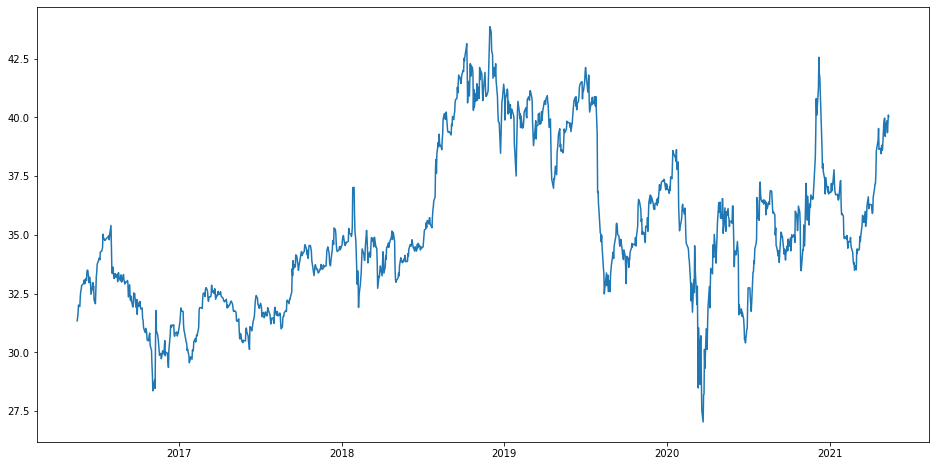

In [31]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']

plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

In [36]:
MONTH_WORK_DAYS = 21
days_watching = 9*MONTH_WORK_DAYS
predict_days = 6*MONTH_WORK_DAYS
test_threshold = df.shape[0]-predict_days
# print(df.shape[0])

In [41]:
data = df.sort_index(ascending=True,axis=0)
df_new = pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
for i in range(0,len(data)):
    df_new["Date"][i] = data['Date'][i]
    df_new["Close"][i] = data["Close"][i]
    
# print(df_new.head())
df_new.index = df_new.Date
df_new.drop("Date", axis=1, inplace=True)

final_dataset = df_new.values

train_data = final_dataset[0:test_threshold,:]
valid_data = final_dataset[test_threshold:,:]
# print(train_data[-10:])
# print()
# print(valid_data[-10:])
print(final_dataset)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(final_dataset)

x_train_data,y_train_data = [],[]

for i in range(days_watching,len(train_data)-predict_days):
    x_train_data.append(scaled_data[i-days_watching:i,0])
    y_train_data.append(scaled_data[i+predict_days,0])
# print(x_train_data[0])
# print(scaler.inverse_transform(np.reshape(x_train_data[0], (1, -1))))
# print()
# print(y_train_data[0])
# print(scaler.inverse_transform(np.reshape(y_train_data[0], (1, -1))))
# print(x_train_data[1])
# print()
# print(y_train_data[1])
x_train_data,y_train_data = np.array(x_train_data),np.array(y_train_data)

x_train_data = np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

[[31.337761]
 [31.470589]
 [31.669828]
 ...
 [39.689999]
 [40.099998]
 [40.02]]


In [38]:
lstm_model = Sequential()
lstm_model.add(LSTM(units=50,return_sequences=False, input_shape=(x_train_data.shape[1],1)))
# lstm_model.add(LSTM(units=50,return_sequences=False, input_shape=(x_train_data.shape[1],1)))
# lstm_model.add(LSTM(units=128, return_sequences=True))
# lstm_model.add(LSTM(units=64, return_sequences=False))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mse',optimizer='adam')
# lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=30,batch_size=40,verbose=2, shuffle=False)

Epoch 1/30
21/21 - 2s - loss: 0.0958
Epoch 2/30
21/21 - 1s - loss: 0.0562
Epoch 3/30
21/21 - 1s - loss: 0.0423
Epoch 4/30
21/21 - 1s - loss: 0.0413
Epoch 5/30
21/21 - 1s - loss: 0.0394
Epoch 6/30
21/21 - 1s - loss: 0.0392
Epoch 7/30
21/21 - 1s - loss: 0.0386
Epoch 8/30
21/21 - 1s - loss: 0.0384
Epoch 9/30
21/21 - 1s - loss: 0.0380
Epoch 10/30
21/21 - 1s - loss: 0.0378
Epoch 11/30
21/21 - 1s - loss: 0.0376
Epoch 12/30
21/21 - 1s - loss: 0.0373
Epoch 13/30
21/21 - 1s - loss: 0.0371
Epoch 14/30
21/21 - 1s - loss: 0.0369
Epoch 15/30
21/21 - 1s - loss: 0.0368
Epoch 16/30
21/21 - 1s - loss: 0.0366
Epoch 17/30
21/21 - 1s - loss: 0.0364
Epoch 18/30
21/21 - 1s - loss: 0.0363
Epoch 19/30
21/21 - 1s - loss: 0.0362
Epoch 20/30
21/21 - 1s - loss: 0.0361
Epoch 21/30
21/21 - 1s - loss: 0.0359
Epoch 22/30
21/21 - 1s - loss: 0.0358
Epoch 23/30
21/21 - 1s - loss: 0.0357
Epoch 24/30
21/21 - 1s - loss: 0.0356
Epoch 25/30
21/21 - 1s - loss: 0.0356
Epoch 26/30
21/21 - 1s - loss: 0.0355
Epoch 27/30
21/21 - 1

315 1132
[[36.27717 ]
 [36.281483]
 [36.294605]
 [36.300858]
 [36.301643]
 [36.29035 ]
 [36.280827]
 [36.272953]
 [36.263557]
 [36.27556 ]
 [36.297054]
 [36.24344 ]
 [36.179882]
 [36.119846]
 [36.058647]
 [36.00081 ]
 [35.966705]
 [35.934776]
 [35.89754 ]
 [35.781796]
 [35.6556  ]
 [35.5227  ]
 [35.39575 ]
 [35.285896]
 [35.180943]
 [35.092922]
 [35.009308]
 [34.923527]
 [34.824875]
 [34.733986]
 [34.643417]
 [34.581192]
 [34.537277]
 [34.541096]
 [34.590843]
 [34.656715]
 [34.710365]
 [34.747547]
 [34.76599 ]
 [34.78732 ]
 [34.852615]
 [34.93006 ]
 [35.022278]
 [35.110504]
 [35.210735]
 [35.315845]
 [35.41983 ]
 [35.57018 ]
 [35.72392 ]
 [35.843582]
 [35.935875]
 [36.05014 ]
 [36.171043]
 [36.26859 ]
 [36.34024 ]
 [36.39119 ]
 [36.429073]
 [36.458878]
 [36.477024]
 [36.4924  ]
 [36.503735]
 [36.495506]
 [36.492935]
 [36.48993 ]
 [36.48254 ]
 [36.48184 ]
 [36.484802]
 [36.48606 ]
 [36.498814]
 [36.520638]
 [36.5433  ]
 [36.55328 ]
 [36.546963]
 [36.528896]
 [36.50816 ]
 [36.484398]
 [3

<ipython-input-39-1e6ed477af26>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions'] = closing_price


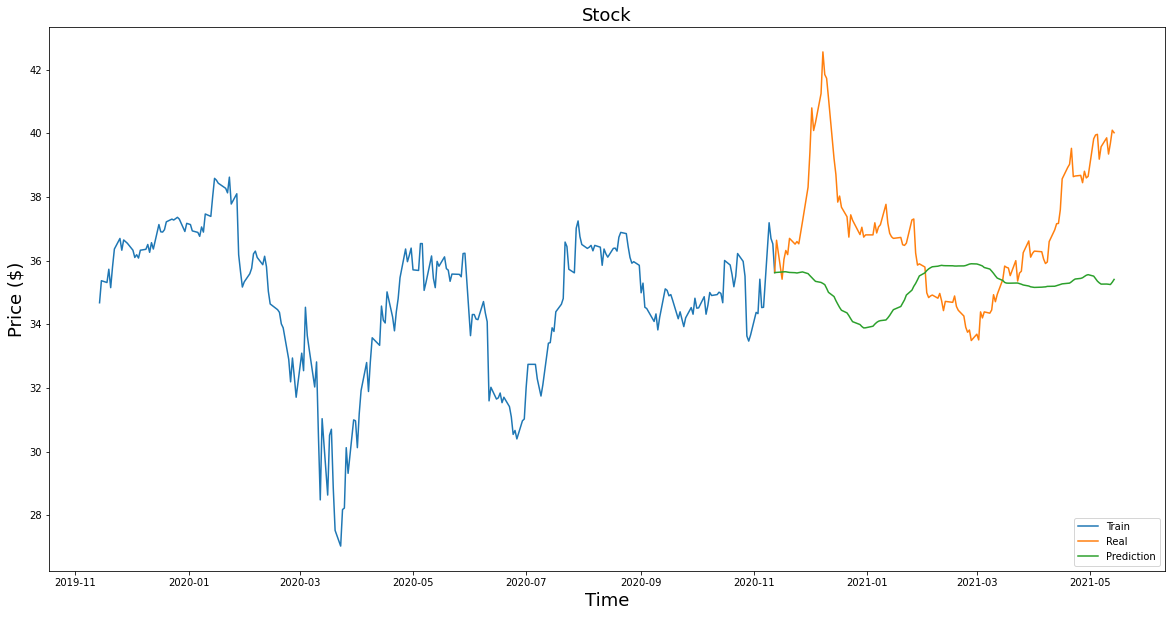

In [39]:
# inputs_data = df_new[0:].values
# inputs_data = df_new[len(df_new)-len(valid_data)-days_watching-predict_days:].values
inputs_data = df_new[len(df_new)-len(valid_data)-days_watching-predict_days:].values
inputs_data = inputs_data.reshape(-1,1)
inputs_data = scaler.transform(inputs_data)

# print("days in test", inputs_data.shape[0])
# base_q = []
# base_q.append(inputs_data[0:days_watching,0])
# print(base_q)
# print(base_q[0])
# close_predict = []

X_test=[]
print(inputs_data.shape[0]-predict_days, test_threshold)
# for i in range(days_watching,inputs_data.shape[0]-predict_days):
for i in range(days_watching,days_watching+predict_days):
    X_test.append(inputs_data[i-days_watching:i,0])
X_test=np.array(X_test)
# print(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
closing_price=lstm_model.predict(X_test)
closing_price=scaler.inverse_transform(closing_price)
print(closing_price)

# X_test = np.array(X_test)

# X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
# closing_price = lstm_model.predict(X_test)
# closing_price = scaler.inverse_transform(closing_price)
# print(X_test, "\n", closing_price)


train_data = df_new[:test_threshold+1]
valid_data = df_new[test_threshold:]
valid_data['Predictions'] = closing_price
first_vals = valid_data.iloc[0]
print(first_vals)
print(first_vals['Predictions']-first_vals['Close'])
valid_data = valid_data.sub([0, first_vals['Predictions']-first_vals['Close']], axis='columns')
# print(train_data)
# print(valid_data)
plt.title('Stock', fontsize=18)
plt.xlabel('Time',fontsize=18)
plt.ylabel('Price ($)',fontsize=18)
plt.plot((train_data["Close"])[-2*predict_days:])
plt.plot((valid_data[['Close',"Predictions"]]))
plt.legend(['Train', 'Real', 'Prediction' ], loc='lower right')

lstm_model.save("saved_lstm_model.h5")
# model = keras.models.load_model('path/to/location')

[[31.650854]
 [31.26186]
 [30.996204]
 [31.081594]
 [31.451612]
 [31.537003]
 [31.527514]
 [31.679317]
 [31.755219]
 [31.783682]]
all: 1258
test count: 943
1258 943
Close          31.793169
Predictions          NaN
Name: 2017-02-15 00:00:00, dtype: object


<ipython-input-40-75b70001d5a0>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions'] = closing_price


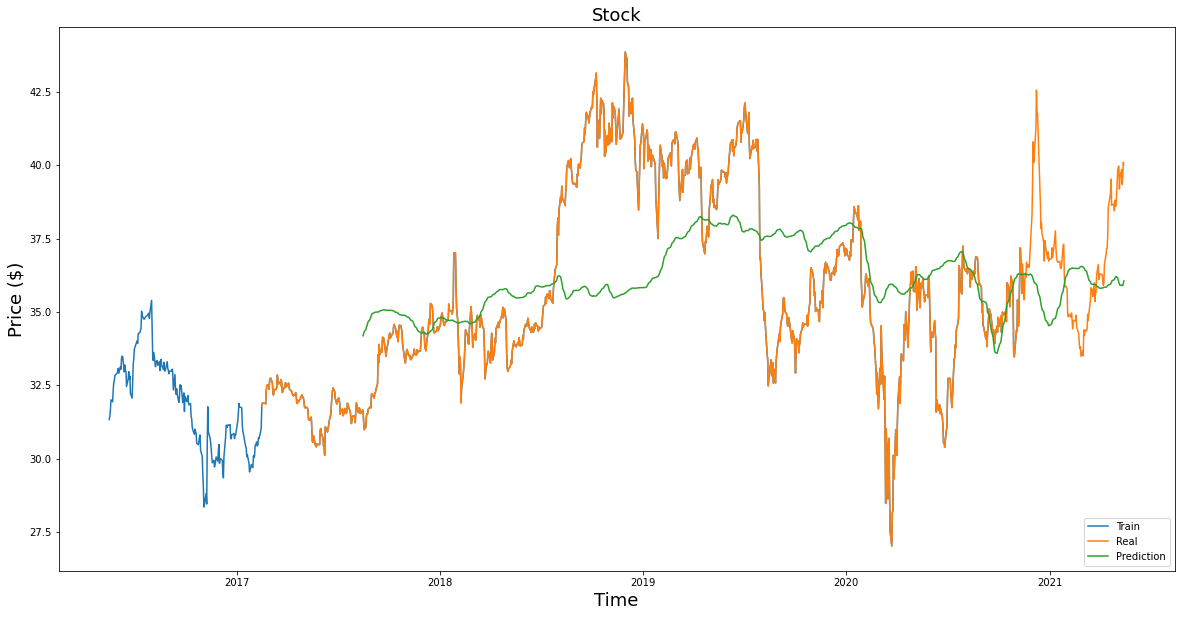

In [40]:
inputs_data = df_new[:].values
print(inputs_data[days_watching+predict_days: days_watching+predict_days+10])
inputs_data = inputs_data.reshape(-1,1)
inputs_data = scaler.transform(inputs_data)

X_test=[]
# for i in range(days_watching, days_watching+1):
for i in range(days_watching, inputs_data.shape[0]-predict_days):
    X_test.append(inputs_data[i-days_watching:i,0])
X_test=np.array(X_test)
# print(X_test)
# print(scaler.inverse_transform(X_test))

print("all:", inputs_data.shape[0])
print("test count:", X_test.shape[0])

X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
closing_price = lstm_model.predict(X_test)
# print('close:', closing_price)
closing_price = scaler.inverse_transform(closing_price)
# print('close inverse:', closing_price)
print(df_new.shape[0], closing_price.shape[0])
train_data = df_new[:test_threshold]
valid_data = df_new[-closing_price.shape[0]-predict_days:]


# print(closing_price[:10])
# closing_price = np.append(np.zeros(20) + np.nan, closing_price)
# print(np.full((predict_days, 1), np.nan))


closing_price = np.append(np.full((predict_days, 1), np.nan), closing_price)


# print(closing_price)
# preds = pd.DataFrame({'Predictions': closing_price[:, 0]})
# print(preds)
# print(valid_data)
# valid_data = pd.concat([valid_data, preds], axis=1)
# print(valid_data)

valid_data['Predictions'] = closing_price

# valid_data['Predictions'] = valid_data['Predictions'].shift(-predict_days)
first_vals = valid_data.iloc[0]
print(first_vals)
# valid_data = valid_data.sub([0, first_vals['Predictions']-first_vals['Close']], axis='columns')

plt.title('Stock', fontsize=18)
plt.xlabel('Time',fontsize=18)
plt.ylabel('Price ($)',fontsize=18)
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])
plt.legend(['Train', 'Real', 'Prediction' ], loc='lower right')

lstm_model.save("saved_lstm_model.h5")
# model = keras.models.load_model('path/to/location')